In [175]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import SelectPercentile, f_classif, VarianceThreshold
import joblib

In [176]:
df = pd.read_csv('parkinsons.csv')
df.tail()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
190,phon_R01_S50_2,174.188,230.978,94.261,0.00459,0.00003,0.00263,0.00259,0.00790,0.04087,...,0.07008,0.02764,19.517,0,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050
191,phon_R01_S50_3,209.516,253.017,89.488,0.00564,0.00003,0.00331,0.00292,0.00994,0.02751,...,0.04812,0.01810,19.147,0,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895
192,phon_R01_S50_4,174.688,240.005,74.287,0.01360,0.00008,0.00624,0.00564,0.01873,0.02308,...,0.03804,0.10715,17.883,0,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728
193,phon_R01_S50_5,198.764,396.961,74.904,0.00740,0.00004,0.00370,0.00390,0.01109,0.02296,...,0.03794,0.07223,19.020,0,0.451221,0.643956,-6.744577,0.207454,2.138608,0.123306
194,phon_R01_S50_6,214.289,260.277,77.973,0.00567,0.00003,0.00295,0.00317,0.00885,0.01884,...,0.03078,0.04398,21.209,0,0.462803,0.664357,-5.724056,0.190667,2.555477,0.148569


In [177]:
df.shape

(195, 24)

In [178]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

In [179]:
df.drop('name',axis=1,inplace=True)

In [180]:
df.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,...,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,...,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,...,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,...,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,...,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


In [181]:
df.isnull().sum()

MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

In [182]:
df[df.duplicated()]

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE


In [183]:
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
numeric_cols = [col for col in numeric_cols if col != 'status']

print("🔢 Numeric columns:", numeric_cols)

#Detect outliers using IQR method
print("\n🔍 Checking for outliers using IQR method...\n")
outlier_summary = {}

for col in numeric_cols:
    if col.lower() not in ['status', 'target']:  # exclude target variable if numeric
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = ((df[col] < lower_bound) | (df[col] > upper_bound)).sum()
        outlier_summary[col] = outliers


🔢 Numeric columns: ['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)', 'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP', 'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5', 'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'RPDE', 'DFA', 'spread1', 'spread2', 'D2', 'PPE']

🔍 Checking for outliers using IQR method...



In [184]:
outlier_df = pd.DataFrame.from_dict(outlier_summary, orient='index', columns=['Outlier Count'])
outlier_df = outlier_df.sort_values(by='Outlier Count', ascending=False)
print(outlier_df)

                  Outlier Count
NHR                          19
MDVP:PPQ                     15
MDVP:RAP                     14
Jitter:DDP                   14
MDVP:Jitter(%)               14
Shimmer:APQ5                 13
MDVP:APQ                     12
MDVP:Fhi(Hz)                 11
MDVP:Shimmer(dB)             10
MDVP:Flo(Hz)                  9
MDVP:Shimmer                  8
MDVP:Jitter(Abs)              7
Shimmer:DDA                   6
Shimmer:APQ3                  6
PPE                           5
spread1                       4
HNR                           3
spread2                       2
D2                            1
MDVP:Fo(Hz)                   0
DFA                           0
RPDE                          0


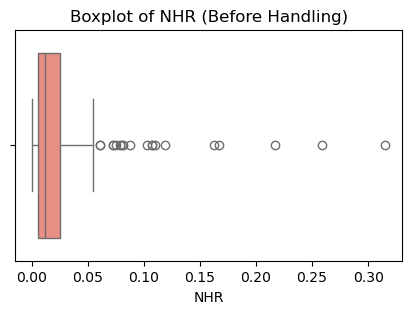

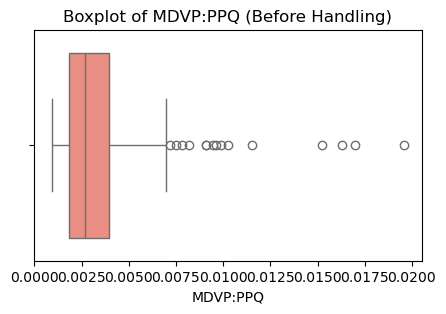

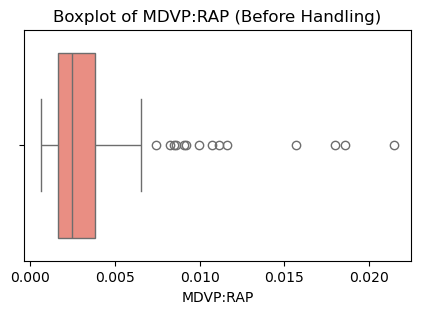

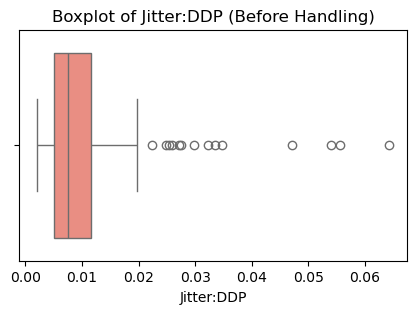

In [185]:
# --- Step 4: Visualize outliers (top 4 columns) ---
top_cols = outlier_df.head(4).index.tolist()
for col in top_cols:
    plt.figure(figsize=(5,3))
    sns.boxplot(x=df[col], color='salmon')
    plt.title(f"Boxplot of {col} (Before Handling)")
    plt.show()

In [186]:
for col in numeric_cols:
    if col.lower() not in ['status', 'target']:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df[col] = np.where(df[col] < lower_bound, lower_bound,
                           np.where(df[col] > upper_bound, upper_bound, df[col]))

print("\n✅ Outliers handled successfully using IQR capping!")


✅ Outliers handled successfully using IQR capping!


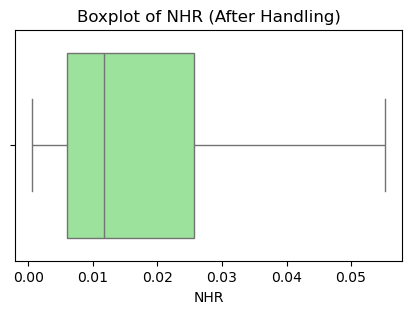

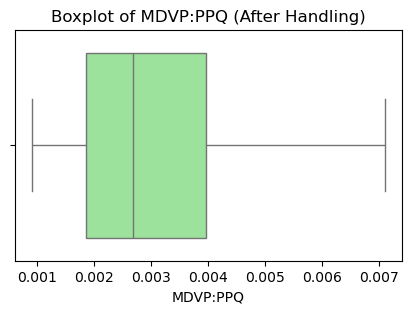

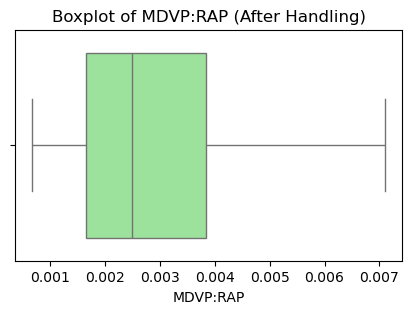

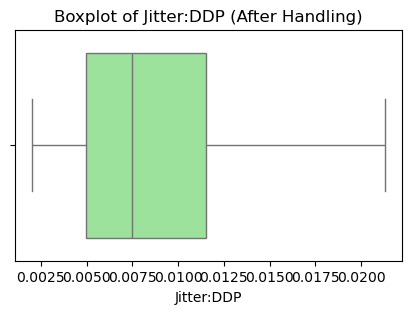

In [187]:
for col in top_cols:
    plt.figure(figsize=(5,3))
    sns.boxplot(x=df[col], color='lightgreen')
    plt.title(f"Boxplot of {col} (After Handling)")
    plt.show()

In [188]:
sns.countplot(df['status'])

<Axes: ylabel='count'>

In [189]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True,vmin=-1,vmax=1,cmap='rainbow')

<Axes: >

In [190]:
sns.pairplot(df)

In [191]:
X = df.drop('status',axis=1)
y = df['status']

In [192]:
print(y.value_counts())
print("Unique labels:", y.unique())


status
1    147
0     48
Name: count, dtype: int64
Unique labels: [1 0]


In [193]:
df['status'].value_counts()


status
1    147
0     48
Name: count, dtype: int64

In [194]:
sm = SMOTE(k_neighbors=10)
X,y = sm.fit_resample(X,y)

In [195]:
sns.countplot(y)

<Axes: xlabel='PPE', ylabel='Count'>

# Feature Selection

In [196]:
sel = VarianceThreshold(threshold=0)
sel.fit(X,y)

VarianceThreshold(threshold=0)

In [197]:
sum(sel.get_support())

np.int64(22)

In [198]:
# Printing the total number of constant features
print(len([x for x in X.columns if x not in X.columns[sel.get_support()]]))
[x for x in X.columns if x not in X.columns[sel.get_support()]]

0


[]

### Selecting the features in the top 20 percentile

In [199]:
percentile = SelectPercentile(f_classif,percentile=20)
percentile.fit(X,y)

SelectPercentile(percentile=20)

'Spread1' and 'PPE' are the most important predictor variables in the entire dataset.

In [200]:
sum(percentile.get_support())

np.int64(5)

In [201]:
X.columns[percentile.get_support()]

Index(['MDVP:Jitter(Abs)', 'MDVP:APQ', 'spread1', 'spread2', 'PPE'], dtype='object')

In [202]:
X = percentile.transform(X)

# Dividing the dataset into training and testing sets

In [203]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.4,random_state=1234)

# Model Training and Evaluation

In [204]:
lr = LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression()

In [205]:
lr_pred = lr.predict(X_test)
lr_pred

array([0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 1])

In [206]:
print(confusion_matrix(y_test,lr_pred))
print(classification_report(y_test,lr_pred))

[[47  9]
 [14 48]]
              precision    recall  f1-score   support

           0       0.77      0.84      0.80        56
           1       0.84      0.77      0.81        62

    accuracy                           0.81       118
   macro avg       0.81      0.81      0.81       118
weighted avg       0.81      0.81      0.81       118



In [207]:
nbr_range = np.arange(1,21)
accuracy_scores = []
for i in nbr_range:
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    knn_pred = knn.predict(X_test)
    accuracy_scores.append(accuracy_score(y_test,knn_pred))

In [208]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [209]:
knn_pred = knn.predict(X_test)
knn_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 1])

In [210]:
print(confusion_matrix(y_test,knn_pred))
print(classification_report(y_test,knn_pred))

[[48  8]
 [15 47]]
              precision    recall  f1-score   support

           0       0.76      0.86      0.81        56
           1       0.85      0.76      0.80        62

    accuracy                           0.81       118
   macro avg       0.81      0.81      0.81       118
weighted avg       0.81      0.81      0.80       118



In [211]:
svm = SVC(random_state=1234)
svm.fit(X_train,y_train)

SVC(random_state=1234)

In [212]:
svm_pred = svm.predict(X_test)
svm_pred

array([0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 1])

In [213]:
print(confusion_matrix(y_test,svm_pred))
print(classification_report(y_test,svm_pred))

[[47  9]
 [15 47]]
              precision    recall  f1-score   support

           0       0.76      0.84      0.80        56
           1       0.84      0.76      0.80        62

    accuracy                           0.80       118
   macro avg       0.80      0.80      0.80       118
weighted avg       0.80      0.80      0.80       118



In [214]:
dtree = DecisionTreeClassifier(random_state=1234)
dtree.fit(X_train,y_train)

DecisionTreeClassifier(random_state=1234)

In [215]:
dtree_pred = dtree.predict(X_test)
dtree_pred

array([0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 1, 0, 0, 1])

In [216]:
print(confusion_matrix(y_test,dtree_pred))
print(classification_report(y_test,dtree_pred))

[[49  7]
 [14 48]]
              precision    recall  f1-score   support

           0       0.78      0.88      0.82        56
           1       0.87      0.77      0.82        62

    accuracy                           0.82       118
   macro avg       0.83      0.82      0.82       118
weighted avg       0.83      0.82      0.82       118



In [217]:
no_of_estimators = np.arange(100,1100,100)
accuracy_scores = []

for i in no_of_estimators:
    rfc = RandomForestClassifier(n_estimators=i,random_state=1234)
    rfc.fit(X_train,y_train)
    rfc_pred = rfc.predict(X_test)
    accuracy_scores.append(accuracy_score(y_test,rfc_pred))

In [218]:
rfc = RandomForestClassifier(n_estimators=200,random_state=1234)
rfc.fit(X_train,y_train)

RandomForestClassifier(n_estimators=200, random_state=1234)

In [219]:
rfc_pred = rfc.predict(X_test)
rfc_pred

array([0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 1])

In [220]:
print(confusion_matrix(y_test,rfc_pred))
print(classification_report(y_test,rfc_pred))

[[54  2]
 [12 50]]
              precision    recall  f1-score   support

           0       0.82      0.96      0.89        56
           1       0.96      0.81      0.88        62

    accuracy                           0.88       118
   macro avg       0.89      0.89      0.88       118
weighted avg       0.89      0.88      0.88       118



In [221]:
xgb = XGBClassifier(random_state=1234)
xgb.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [222]:
xgb_pred = xgb.predict(X_test)

In [223]:
print(confusion_matrix(y_test,xgb_pred))
print(classification_report(y_test,xgb_pred))

[[54  2]
 [11 51]]
              precision    recall  f1-score   support

           0       0.83      0.96      0.89        56
           1       0.96      0.82      0.89        62

    accuracy                           0.89       118
   macro avg       0.90      0.89      0.89       118
weighted avg       0.90      0.89      0.89       118



In [224]:
gnb = GaussianNB()
gnb.fit(X_train,y_train)

GaussianNB()

In [225]:
gnb_pred = gnb.predict(X_test)
gnb_pred

array([0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 1])

In [226]:
print(confusion_matrix(y_test,gnb_pred))
print(classification_report(y_test,gnb_pred))

[[55  1]
 [12 50]]
              precision    recall  f1-score   support

           0       0.82      0.98      0.89        56
           1       0.98      0.81      0.88        62

    accuracy                           0.89       118
   macro avg       0.90      0.89      0.89       118
weighted avg       0.90      0.89      0.89       118



In [227]:
param_grid = {'C': [1,10,100,1000,10000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf']}

In [228]:
grid_search = GridSearchCV(SVC(),param_grid,refit=True,verbose=0)
grid_search.fit(X_train,y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [1, 10, 100, 1000, 10000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']})

In [229]:
grid_search.best_estimator_

SVC(C=10000, gamma=0.1)

In [230]:
grid_search.best_score_

np.float64(0.8234920634920636)

In [231]:
optimised_svm_pred = grid_search.predict(X_test)
optimised_svm_pred

array([0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 1])

In [232]:
print(confusion_matrix(y_test,optimised_svm_pred))
print(classification_report(y_test,optimised_svm_pred))

[[56  0]
 [17 45]]
              precision    recall  f1-score   support

           0       0.77      1.00      0.87        56
           1       1.00      0.73      0.84        62

    accuracy                           0.86       118
   macro avg       0.88      0.86      0.85       118
weighted avg       0.89      0.86      0.85       118



In [233]:
param_grid = {'criterion': ["gini", "entropy"],
              'splitter': ["best", "random"],
              'max_depth': [5,10,15,20,25],
              'max_features': ['auto','sqrt','log2']
             }

In [234]:
grid_search = GridSearchCV(DecisionTreeClassifier(random_state=1234),param_grid,refit=True,verbose=0)
grid_search.fit(X_train,y_train)

GridSearchCV(estimator=DecisionTreeClassifier(random_state=1234),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 10, 15, 20, 25],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']})

GridSearchCV(estimator=DecisionTreeClassifier(random_state=1234),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 10, 15, 20, 25],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             verbose=3)

In [235]:
grid_search.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=20, max_features='sqrt',
                       random_state=1234, splitter='random')

In [236]:
grid_search.best_score_

np.float64(0.8753968253968253)

In [237]:
optimised_dtree_pred = grid_search.predict(X_test)

In [238]:
print(confusion_matrix(y_test,optimised_dtree_pred))
print(classification_report(y_test,optimised_dtree_pred))

[[54  2]
 [11 51]]
              precision    recall  f1-score   support

           0       0.83      0.96      0.89        56
           1       0.96      0.82      0.89        62

    accuracy                           0.89       118
   macro avg       0.90      0.89      0.89       118
weighted avg       0.90      0.89      0.89       118



In [239]:
param_grid = {
    'n_estimators': [100,500,700,900],
    'criterion': ['gini','entropy'],
    'max_features': ['auto','sqrt','log2'],
    'oob_score': [True,False],
    'class_weight': ['balanced','balanced_subsample']}

In [240]:
grid_search = GridSearchCV(RandomForestClassifier(random_state=1234),param_grid,refit=True,verbose=0)
grid_search.fit(X_train,y_train)

GridSearchCV(estimator=RandomForestClassifier(random_state=1234),
             param_grid={'class_weight': ['balanced', 'balanced_subsample'],
                         'criterion': ['gini', 'entropy'],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [100, 500, 700, 900],
                         'oob_score': [True, False]})

[CV]  class_weight=balanced, criterion=entropy, max_features=log2, n_estimators=700, oob_score=True, score=0.857, total=   2.1s
[CV] class_weight=balanced, criterion=entropy, max_features=log2, n_estimators=700, oob_score=True 
[CV]  class_weight=balanced, criterion=entropy, max_features=log2, n_estimators=700, oob_score=True, score=0.800, total=   2.1s
[CV] class_weight=balanced, criterion=entropy, max_features=log2, n_estimators=700, oob_score=False 
[CV]  class_weight=balanced, criterion=entropy, max_features=log2, n_estimators=700, oob_score=False, score=0.889, total=   1.8s
[CV] class_weight=balanced, criterion=entropy, max_features=log2, n_estimators=700, oob_score=False 
[CV]  class_weight=balanced, criterion=entropy, max_features=log2, n_estimators=700, oob_score=False, score=0.886, total=   1.7s
[CV] class_weight=balanced, criterion=entropy, max_features=log2, n_estimators=700, oob_score=False 
[CV]  class_weight=balanced, criterion=entropy, max_features=log2, n_estimators=700

[CV]  class_weight=balanced_subsample, criterion=gini, max_features=auto, n_estimators=500, oob_score=False, score=0.857, total=   2.3s
[CV] class_weight=balanced_subsample, criterion=gini, max_features=auto, n_estimators=500, oob_score=False 
[CV]  class_weight=balanced_subsample, criterion=gini, max_features=auto, n_estimators=500, oob_score=False, score=0.800, total=   1.9s
[CV] class_weight=balanced_subsample, criterion=gini, max_features=auto, n_estimators=700, oob_score=True 
[CV]  class_weight=balanced_subsample, criterion=gini, max_features=auto, n_estimators=700, oob_score=True, score=0.917, total=   3.3s
[CV] class_weight=balanced_subsample, criterion=gini, max_features=auto, n_estimators=700, oob_score=True 
[CV]  class_weight=balanced_subsample, criterion=gini, max_features=auto, n_estimators=700, oob_score=True, score=0.857, total=   3.3s
[CV] class_weight=balanced_subsample, criterion=gini, max_features=auto, n_estimators=700, oob_score=True 
[CV]  class_weight=balanced_s

[CV]  class_weight=balanced_subsample, criterion=gini, max_features=sqrt, n_estimators=500, oob_score=True, score=0.800, total=   1.3s
[CV] class_weight=balanced_subsample, criterion=gini, max_features=sqrt, n_estimators=500, oob_score=True 
[CV]  class_weight=balanced_subsample, criterion=gini, max_features=sqrt, n_estimators=500, oob_score=True, score=0.857, total=   1.3s
[CV] class_weight=balanced_subsample, criterion=gini, max_features=sqrt, n_estimators=500, oob_score=True 
[CV]  class_weight=balanced_subsample, criterion=gini, max_features=sqrt, n_estimators=500, oob_score=True, score=0.800, total=   1.0s
[CV] class_weight=balanced_subsample, criterion=gini, max_features=sqrt, n_estimators=500, oob_score=False 
[CV]  class_weight=balanced_subsample, criterion=gini, max_features=sqrt, n_estimators=500, oob_score=False, score=0.917, total=   0.8s
[CV] class_weight=balanced_subsample, criterion=gini, max_features=sqrt, n_estimators=500, oob_score=False 
[CV]  class_weight=balanced_s

[CV]  class_weight=balanced_subsample, criterion=gini, max_features=log2, n_estimators=100, oob_score=False, score=0.886, total=   0.2s
[CV] class_weight=balanced_subsample, criterion=gini, max_features=log2, n_estimators=100, oob_score=False 
[CV]  class_weight=balanced_subsample, criterion=gini, max_features=log2, n_estimators=100, oob_score=False, score=0.800, total=   0.2s
[CV] class_weight=balanced_subsample, criterion=gini, max_features=log2, n_estimators=100, oob_score=False 
[CV]  class_weight=balanced_subsample, criterion=gini, max_features=log2, n_estimators=100, oob_score=False, score=0.857, total=   0.2s
[CV] class_weight=balanced_subsample, criterion=gini, max_features=log2, n_estimators=100, oob_score=False 
[CV]  class_weight=balanced_subsample, criterion=gini, max_features=log2, n_estimators=100, oob_score=False, score=0.829, total=   0.2s
[CV] class_weight=balanced_subsample, criterion=gini, max_features=log2, n_estimators=500, oob_score=True 
[CV]  class_weight=balanc

[CV]  class_weight=balanced_subsample, criterion=entropy, max_features=auto, n_estimators=100, oob_score=True, score=0.861, total=   0.3s
[CV] class_weight=balanced_subsample, criterion=entropy, max_features=auto, n_estimators=100, oob_score=True 
[CV]  class_weight=balanced_subsample, criterion=entropy, max_features=auto, n_estimators=100, oob_score=True, score=0.857, total=   0.2s
[CV] class_weight=balanced_subsample, criterion=entropy, max_features=auto, n_estimators=100, oob_score=True 
[CV]  class_weight=balanced_subsample, criterion=entropy, max_features=auto, n_estimators=100, oob_score=True, score=0.800, total=   0.2s
[CV] class_weight=balanced_subsample, criterion=entropy, max_features=auto, n_estimators=100, oob_score=True 
[CV]  class_weight=balanced_subsample, criterion=entropy, max_features=auto, n_estimators=100, oob_score=True, score=0.857, total=   0.3s
[CV] class_weight=balanced_subsample, criterion=entropy, max_features=auto, n_estimators=100, oob_score=True 
[CV]  cl

[CV]  class_weight=balanced_subsample, criterion=entropy, max_features=auto, n_estimators=900, oob_score=True, score=0.857, total=   2.1s
[CV] class_weight=balanced_subsample, criterion=entropy, max_features=auto, n_estimators=900, oob_score=True 
[CV]  class_weight=balanced_subsample, criterion=entropy, max_features=auto, n_estimators=900, oob_score=True, score=0.800, total=   2.2s
[CV] class_weight=balanced_subsample, criterion=entropy, max_features=auto, n_estimators=900, oob_score=False 
[CV]  class_weight=balanced_subsample, criterion=entropy, max_features=auto, n_estimators=900, oob_score=False, score=0.889, total=   1.6s
[CV] class_weight=balanced_subsample, criterion=entropy, max_features=auto, n_estimators=900, oob_score=False 
[CV]  class_weight=balanced_subsample, criterion=entropy, max_features=auto, n_estimators=900, oob_score=False, score=0.886, total=   1.7s
[CV] class_weight=balanced_subsample, criterion=entropy, max_features=auto, n_estimators=900, oob_score=False 
[CV

[CV]  class_weight=balanced_subsample, criterion=entropy, max_features=sqrt, n_estimators=700, oob_score=False, score=0.886, total=   1.3s
[CV] class_weight=balanced_subsample, criterion=entropy, max_features=sqrt, n_estimators=700, oob_score=False 
[CV]  class_weight=balanced_subsample, criterion=entropy, max_features=sqrt, n_estimators=700, oob_score=False, score=0.800, total=   1.7s
[CV] class_weight=balanced_subsample, criterion=entropy, max_features=sqrt, n_estimators=700, oob_score=False 
[CV]  class_weight=balanced_subsample, criterion=entropy, max_features=sqrt, n_estimators=700, oob_score=False, score=0.857, total=   1.2s
[CV] class_weight=balanced_subsample, criterion=entropy, max_features=sqrt, n_estimators=700, oob_score=False 
[CV]  class_weight=balanced_subsample, criterion=entropy, max_features=sqrt, n_estimators=700, oob_score=False, score=0.800, total=   1.2s
[CV] class_weight=balanced_subsample, criterion=entropy, max_features=sqrt, n_estimators=900, oob_score=True 
[

[CV]  class_weight=balanced_subsample, criterion=entropy, max_features=log2, n_estimators=500, oob_score=False, score=0.800, total=   1.1s
[CV] class_weight=balanced_subsample, criterion=entropy, max_features=log2, n_estimators=700, oob_score=True 
[CV]  class_weight=balanced_subsample, criterion=entropy, max_features=log2, n_estimators=700, oob_score=True, score=0.889, total=   1.5s
[CV] class_weight=balanced_subsample, criterion=entropy, max_features=log2, n_estimators=700, oob_score=True 
[CV]  class_weight=balanced_subsample, criterion=entropy, max_features=log2, n_estimators=700, oob_score=True, score=0.886, total=   2.8s
[CV] class_weight=balanced_subsample, criterion=entropy, max_features=log2, n_estimators=700, oob_score=True 
[CV]  class_weight=balanced_subsample, criterion=entropy, max_features=log2, n_estimators=700, oob_score=True, score=0.800, total=   1.4s
[CV] class_weight=balanced_subsample, criterion=entropy, max_features=log2, n_estimators=700, oob_score=True 
[CV]  c

[Parallel(n_jobs=1)]: Done 480 out of 480 | elapsed: 10.5min finished


GridSearchCV(estimator=RandomForestClassifier(random_state=1234),
             param_grid={'class_weight': ['balanced', 'balanced_subsample'],
                         'criterion': ['gini', 'entropy'],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [100, 500, 700, 900],
                         'oob_score': [True, False]},
             verbose=4)

In [241]:
grid_search.best_score_

np.float64(0.8860317460317461)

In [242]:
rfc = RandomForestClassifier(class_weight='balanced_subsample', criterion='entropy', max_features='log2', n_estimators=500, oob_score=True, random_state=60)
rfc.fit(X_train,y_train)

RandomForestClassifier(class_weight='balanced_subsample', criterion='entropy',
                       max_features='log2', n_estimators=500, oob_score=True,
                       random_state=60)

In [243]:
optimised_rfc_pred = rfc.predict(X_test)

In [244]:
print(confusion_matrix(y_test,optimised_rfc_pred))
print(classification_report(y_test,optimised_rfc_pred))

[[54  2]
 [11 51]]
              precision    recall  f1-score   support

           0       0.83      0.96      0.89        56
           1       0.96      0.82      0.89        62

    accuracy                           0.89       118
   macro avg       0.90      0.89      0.89       118
weighted avg       0.90      0.89      0.89       118



## Conclusion

In [245]:
print("Performance of all ML models used:")
print("Accuracy Score of Logistic Regression:",str(np.round(accuracy_score(y_test,lr_pred)*100,2)) + '%')
print("Accuracy Score of K Neighbors Classifier:",str(np.round(accuracy_score(y_test,knn_pred)*100,2)) + '%')
print("Accuracy Score of Support Vector Classifier:",str(np.round(accuracy_score(y_test,optimised_svm_pred)*100,2)) + '%')
print("Accuracy Score of Decision Tree Classifier:",str(np.round(accuracy_score(y_test,optimised_dtree_pred)*100,2)) + '%')
print("Accuracy Score of Random Forest Classifier:",str(np.round(accuracy_score(y_test,optimised_rfc_pred)*100,2)) + '%')
print("Accuracy Score of Gaussian Naive Bayes:",str(np.round(accuracy_score(y_test,gnb_pred)*100,2)) + '%')
print("Accuracy Score of XG Boost Classifier:",str(np.round(accuracy_score(y_test,xgb_pred)*100,2)) + '%')

Performance of all ML models used:
Accuracy Score of Logistic Regression: 80.51%
Accuracy Score of K Neighbors Classifier: 80.51%
Accuracy Score of Support Vector Classifier: 85.59%
Accuracy Score of Decision Tree Classifier: 88.98%
Accuracy Score of Random Forest Classifier: 88.98%
Accuracy Score of Gaussian Naive Bayes: 88.98%
Accuracy Score of XG Boost Classifier: 88.98%


In [246]:
import pickle

# Save the trained XGBoost model
pickle.dump(xgb, open("model.pkl", "wb"))
print("✅ Model saved successfully as model.pkl")


✅ Model saved successfully as model.pkl


In [247]:
with open("model.pkl", "rb") as f:
    model = pickle.load(f)

print("✅ Model loaded successfully!")
print(type(model))


✅ Model loaded successfully!
<class 'xgboost.sklearn.XGBClassifier'>
